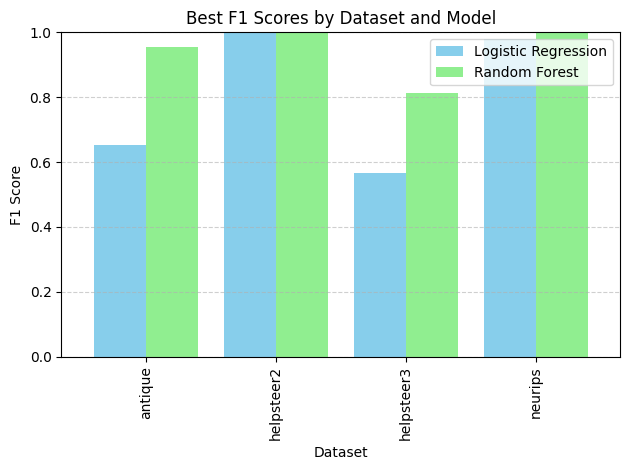

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

metrics = pd.read_csv('metrics.csv')

random_forest_samples = metrics[metrics['Model'] == 'Random Forest']
logistic_regression_samples = metrics[metrics['Model'] == 'Logistic Regression']

random_forest_results = random_forest_samples.loc[random_forest_samples.groupby('Dataset')['F1'].idxmax()]
logistic_regression_results = logistic_regression_samples.loc[logistic_regression_samples.groupby('Dataset')['F1'].idxmax()]

df_results = pd.DataFrame({
    'Logistic Regression': logistic_regression_results.set_index('Dataset')['F1'],
    'Random Forest': random_forest_results.set_index('Dataset')['F1'],
})

ax = df_results.plot(kind='bar', width=0.8, color=['skyblue', 'lightgreen'])
ax.set_title('Best F1 Scores by Dataset and Model')
ax.set_ylabel('F1 Score')
ax.set_ylim(0, 1)
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


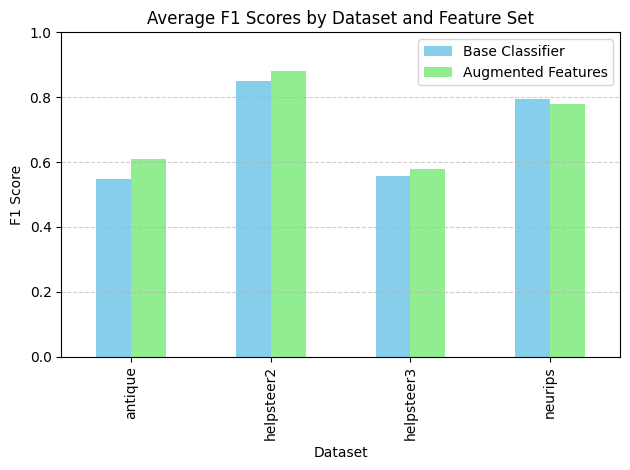

In [3]:
base = metrics[metrics['Task'] == 'Judgement Features']
aug = metrics[metrics['Task'] == 'Augmented features']

base_results = base.groupby('Dataset')['F1'].mean()
aug_results = aug.groupby('Dataset')['F1'].mean()

df_results = pd.DataFrame({
    'Base Classifier': base_results,
    'Augmented Features': aug_results
}).fillna(0)

ax = df_results.plot(kind='bar', color=['skyblue', 'lightgreen'])
ax.set_title('Average F1 Scores by Dataset and Feature Set')
ax.set_ylabel('F1 Score')
ax.set_ylim(0, 1)
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


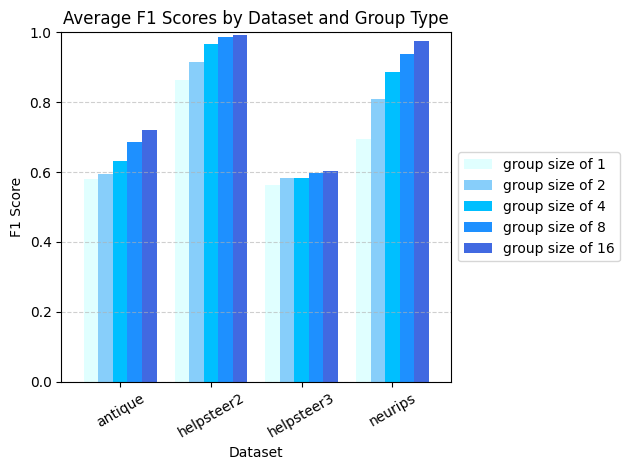

In [4]:
subset = metrics[metrics['Task'].str.contains('GroupSize', case=False, na=False)].copy()

def fix_task_name_to_label(t):
    if "GroupSize" in t:
        size = t.split("_")[1]
        return f"group size of {size}"
    return t

subset['GroupLabel'] = subset['Task'].apply(fix_task_name_to_label)

group_results = subset.groupby(['Dataset', 'GroupLabel'])['F1'].mean().unstack().fillna(0)

# make it in order (otherwise group size of 16 is after group size of 1)
order = ["group size of 1","group size of 2","group size of 4","group size of 8","group size of 16"]
existing_cols = [col for col in order if col in group_results.columns]
group_results = group_results[existing_cols]

ax = group_results.plot(kind='bar', width=0.8, color=['lightcyan', 'lightskyblue', 'deepskyblue', 'dodgerblue', 'royalblue'])
ax.set_title('Average F1 Scores by Dataset and Group Type')
ax.set_ylabel('F1 Score')
ax.set_ylim(0, 1)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


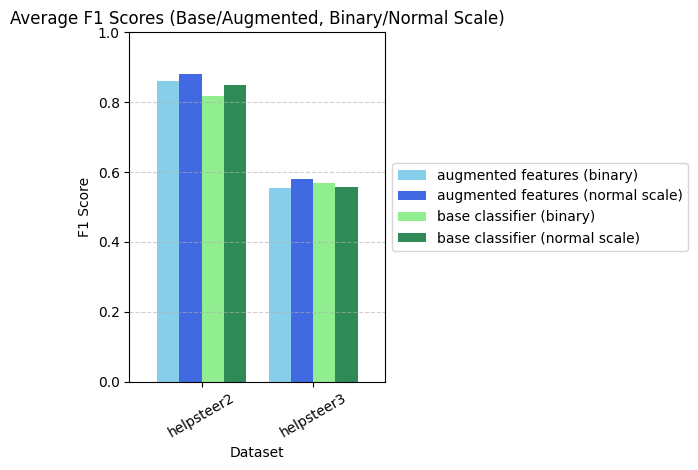

In [15]:
# names were changed in csv so remapping to what it was in the .json version
label_mapper = {
    'Judgement Features': 'base classifier',
    'Augmented features': 'augmented features',
}

binarized = metrics[metrics['Task'] == 'Ratingscale Analysis'].copy()
binarized.reset_index(drop=True, inplace=True)
binarized.loc[:3, 'group_label'] = "base classifier (binary)"
binarized.loc[4:, 'group_label'] = "augmented features (binary)"

normal = metrics[
    (metrics['Task'].isin(['Judgement Features', 'Augmented features'])) &
    (metrics['Dataset'].isin(['helpsteer2', 'helpsteer3']))
].copy()
normal['group_label'] = normal['Task'].map(label_mapper) + " (normal scale)"

group_results = pd.concat([binarized, normal]).groupby(['Dataset', 'group_label'])['F1'].mean().unstack().fillna(0)

ax = group_results.plot(kind='bar', width=0.8, color=['skyblue', 'royalblue', 'lightgreen', 'seagreen'])
ax.set_title('Average F1 Scores (Base/Augmented, Binary/Normal Scale)')
ax.set_ylabel('F1 Score')
ax.set_ylim(0, 1)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

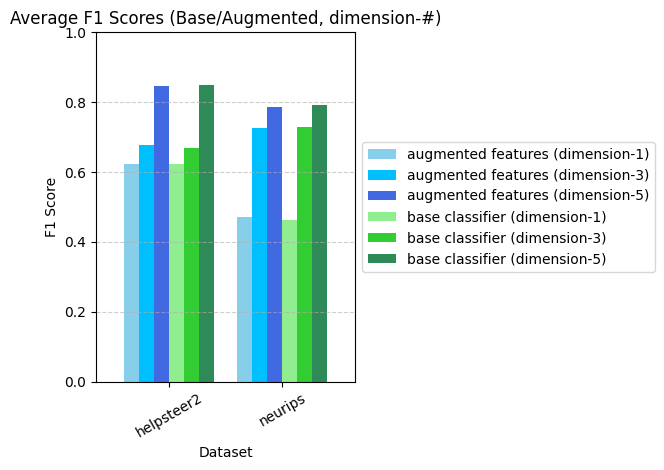

In [22]:
dimensional = metrics[metrics['Task'].str.contains('JudgementDimension')].copy()

dimensional.reset_index(drop=True, inplace=True)
dimensional.loc[:11, 'Task'] = "base classifier (dimension-" + dimensional.loc[:11, 'Task'].str.split('_').str[1] + ")"
dimensional.loc[12:, 'Task'] = "augmented features (dimension-" + dimensional.loc[12:, 'Task'].str.split('_').str[1] + ")"

group_results = dimensional.groupby(['Dataset', 'Task'])['F1'].mean().unstack(fill_value=0)

ax = group_results.plot(kind='bar', width=0.8, color=['skyblue', 'deepskyblue', 'royalblue', 'lightgreen', 'limegreen', 'seagreen'])
ax.set_title('Average F1 Scores (Base/Augmented, dimension-#)')
ax.set_ylabel('F1 Score')
ax.set_ylim(0, 1)
ax.grid(axis='y', linestyle='--', alpha=0.6)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()